<a id=0></a>

# Exploratory Data Analysis

*In this notebook im goint to analyze some hypothesis:*

- [1. There is a relation between Air temperature amplitude and Air moisture amplitude](#1)
- [2. There is a relation between Derivate of Air Pression in 24h and air temperature](#2)
- [3. Analyzing heat waves along the years](#3)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('default')

In [9]:
data = pd.read_csv("DATA111_2DAILY_V0.csv")

In [3]:
data.head(2)

YEAR  DAY365  MAX_N_WNDVEL_5M  DIR_MAX_N_WNDVEL_5M  MIN_N_WNDVEL_5M  \
0  1997.0     1.0           5561.0                 9.33            0.892   
1  1997.0     2.0           4266.0               154.70            0.363   

   DIR_MIN_N_WNDVEL_5M  MEAN_N_WNDVEL_5M  MAX_N_WNDVEL_2M  \
0                31.87       2302.065328           3075.0   
1                63.72       1949.374418           2876.0   

   DIR_MAX_N_WNDVEL_2M  MIN_N_WNDVEL_2M        ...          \
0                134.4            0.763        ...           
1                152.0            0.626        ...           

   MAX_N_PRESSION_HPA  DIR_MAX_N_PRESSION_HPA  MIN_N_PRESSION_HPA  \
0               945.0                    91.0               940.0   
1               947.0                   140.6               942.0   

   DIR_MIN_N_PRESSION_HPA  MEAN_N_PRESSION_HPA  MAX_N_RAIN_SUM10  \
0                   181.4           942.831933               0.0   
1                   125.6           943.809091               0.0   

   DIR_MAX_N_RAIN_SUM10  MIN_N_RAIN_SUM10  DIR_MIN_N_RAIN_SUM10  \
0                  8.32               0.0                  8.32   
1                131.60               0.0                131.60   

   MEAN_N_RAIN_SUM10  
0                0.0  
1                0.0  

[2 rows x 72 columns]

In [4]:
data.columns

Index(['YEAR', 'DAY365', 'MAX_N_WNDVEL_5M', 'DIR_MAX_N_WNDVEL_5M',
       'MIN_N_WNDVEL_5M', 'DIR_MIN_N_WNDVEL_5M', 'MEAN_N_WNDVEL_5M',
       'MAX_N_WNDVEL_2M', 'DIR_MAX_N_WNDVEL_2M', 'MIN_N_WNDVEL_2M',
       'DIR_MIN_N_WNDVEL_2M', 'MEAN_N_WNDVEL_2M', 'MAX_N_WNDDIR_DEGREE',
       'DIR_MAX_N_WNDDIR_DEGREE', 'MIN_N_WNDDIR_DEGREE',
       'DIR_MIN_N_WNDDIR_DEGREE', 'MEAN_N_WNDDIR_DEGREE', 'MAX_N_INCRAD_10MSR',
       'DIR_MAX_N_INCRAD_10MSR', 'MIN_N_INCRAD_10MSR',
       'DIR_MIN_N_INCRAD_10MSR', 'MEAN_N_INCRAD_10MSR', 'MAX_N_REFRAD_10MSR',
       'DIR_MAX_N_REFRAD_10MSR', 'MIN_N_REFRAD_10MSR',
       'DIR_MIN_N_REFRAD_10MSR', 'MEAN_N_REFRAD_10MSR', 'MAX_N_PHTFLOW_10MSR',
       'DIR_MAX_N_PHTFLOW_10MSR', 'MIN_N_PHTFLOW_10MSR',
       'DIR_MIN_N_PHTFLOW_10MSR', 'MEAN_N_PHTFLOW_10MSR',
       'MAX_N_NHTFLOW_10MSR', 'DIR_MAX_N_NHTFLOW_10MSR', 'MIN_N_NHTFLOW_10MSR',
       'DIR_MIN_N_NHTFLOW_10MSR', 'MEAN_N_NHTFLOW_10MSR', 'MAX_N_AIRMTR_PCT10',
       'DIR_MAX_N_AIRMTR_PCT10', 'MIN_N_AIRM

<a id=1></a>

# 1. There is a relation between Air temperature amplitude and Air moisture amplitude

Second hypothesis: Larger thermal amplitude has less value of moisture than others

In [10]:
#Creating thermal amplitude and moisture amplitude variables

data['N_THERMAMP'] = data['MAX_N_AIRTMP_MED10'] - data['MIN_N_AIRTMP_MED10']

print(data[data['N_THERMAMP'] < 0].shape[0])

data['N_MTRAMP'] = data['MAX_N_AIRMTR_PCT10'] - data['MIN_N_AIRMTR_PCT10']

print(data[data['N_MTRAMP'] < 0].shape[0])

0
0


### Data visualization

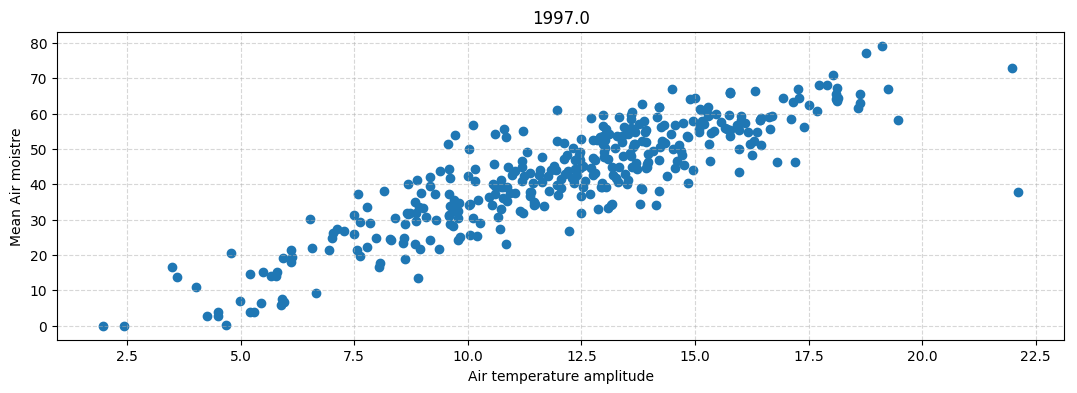

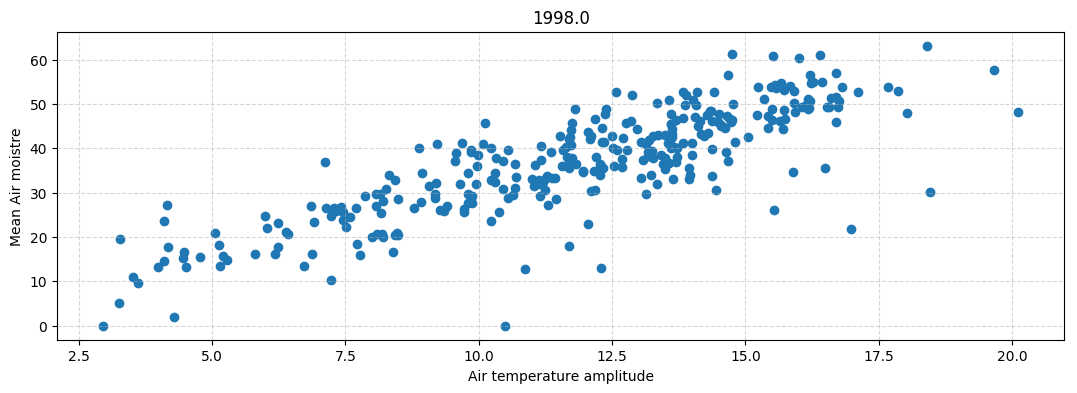

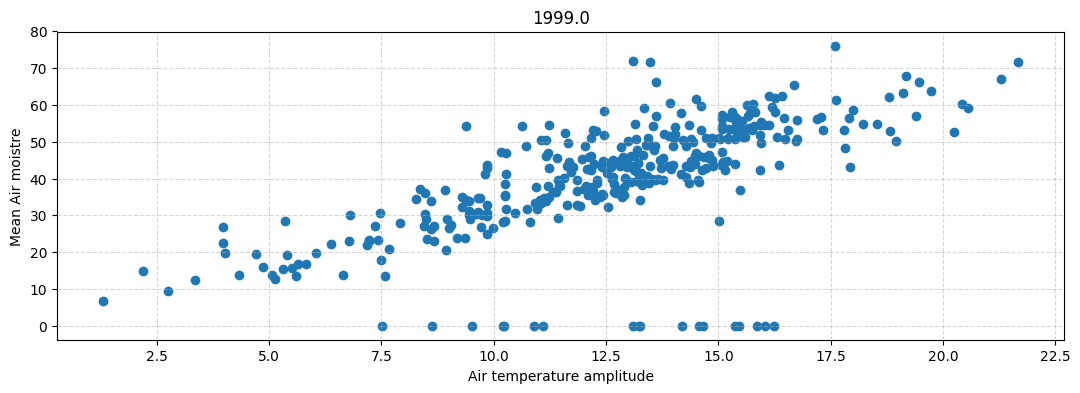

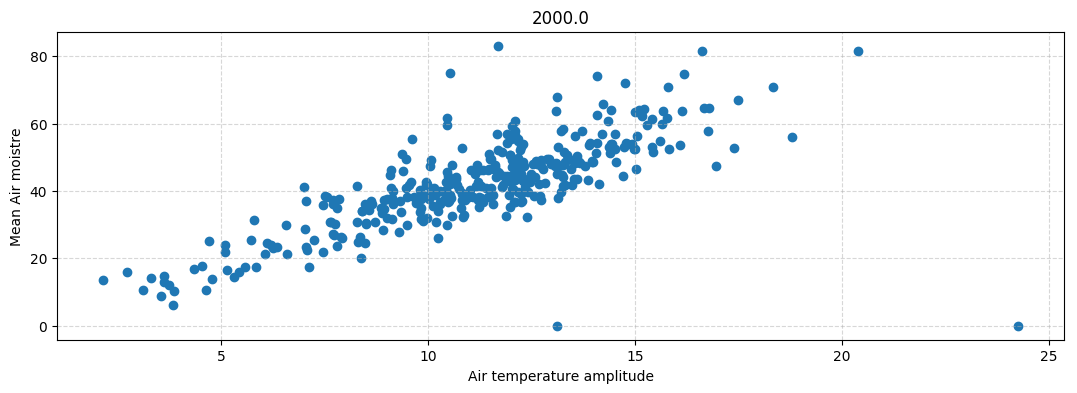

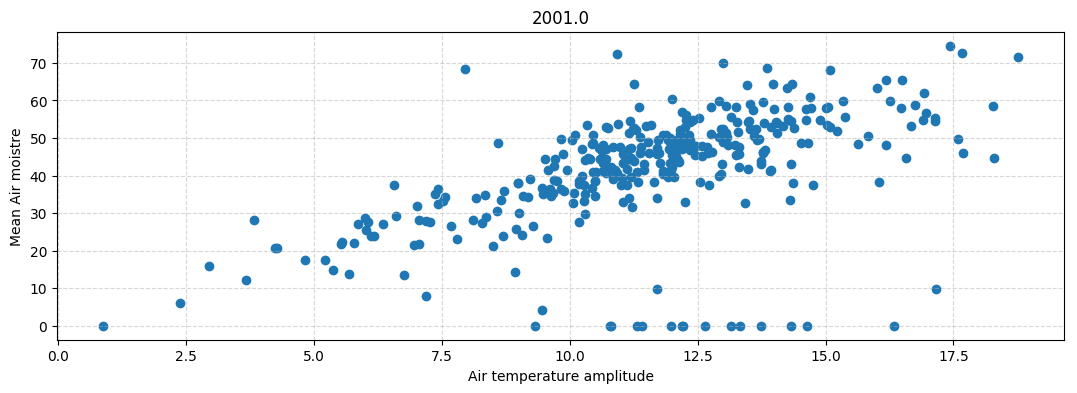

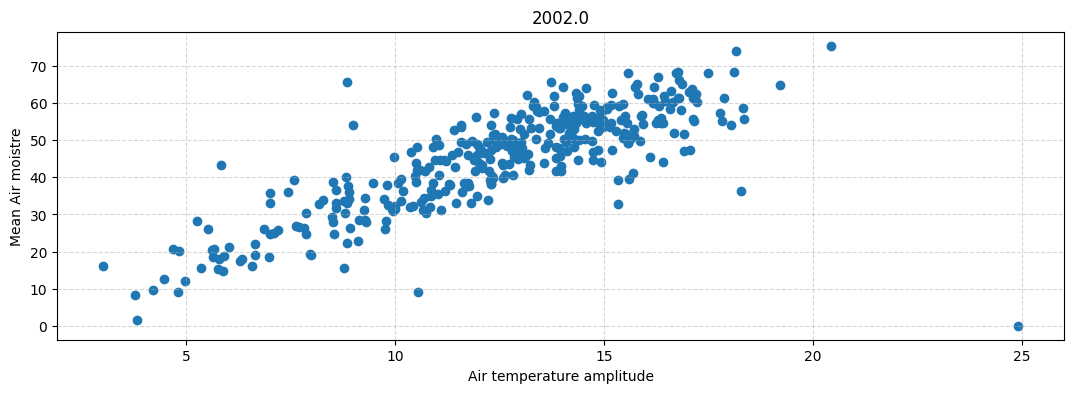

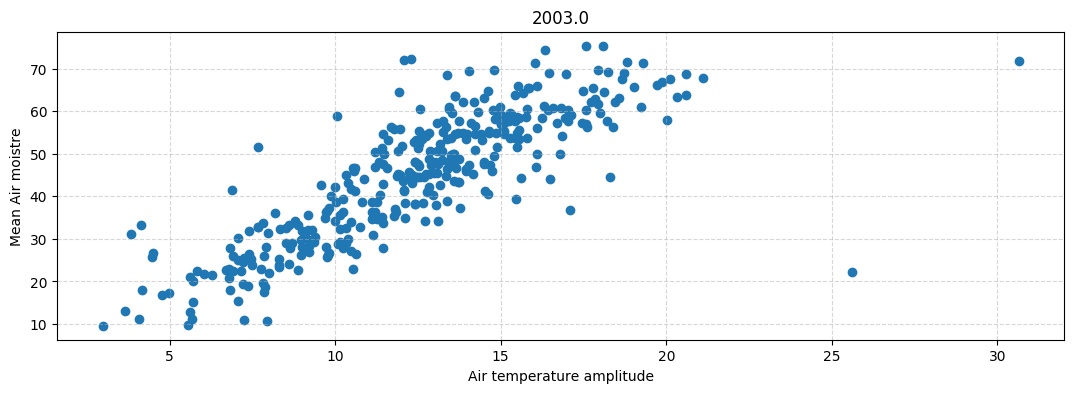

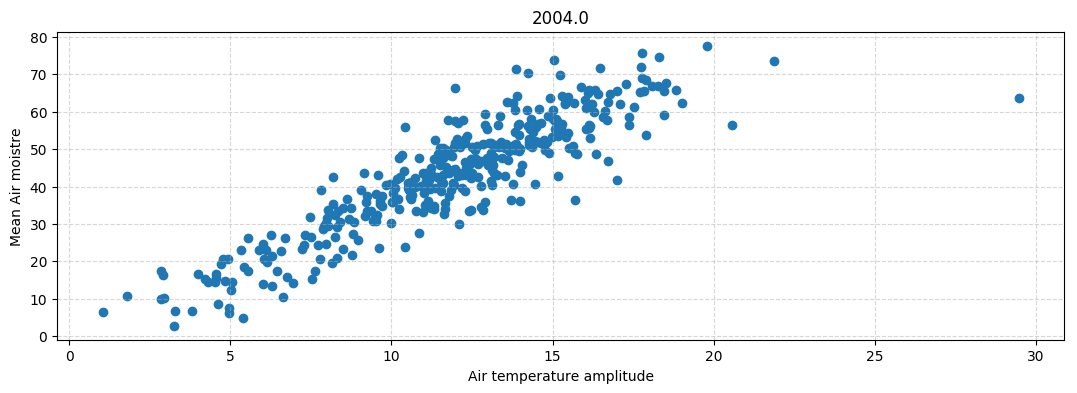

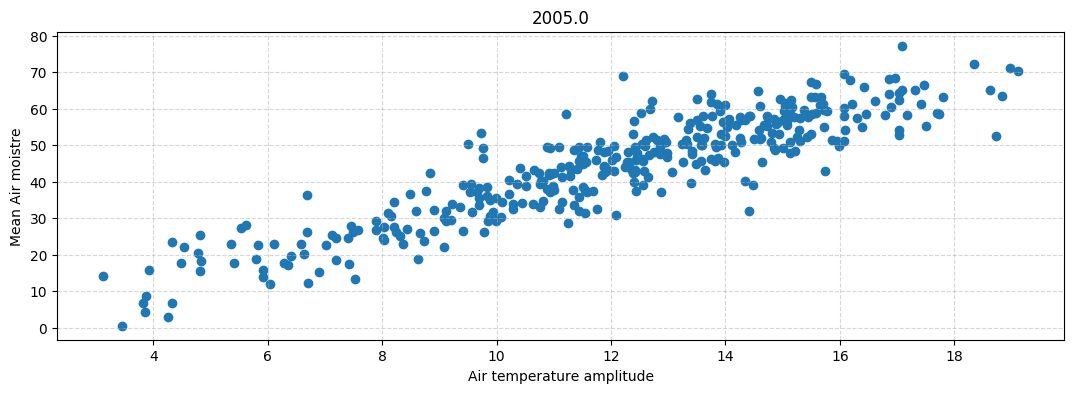

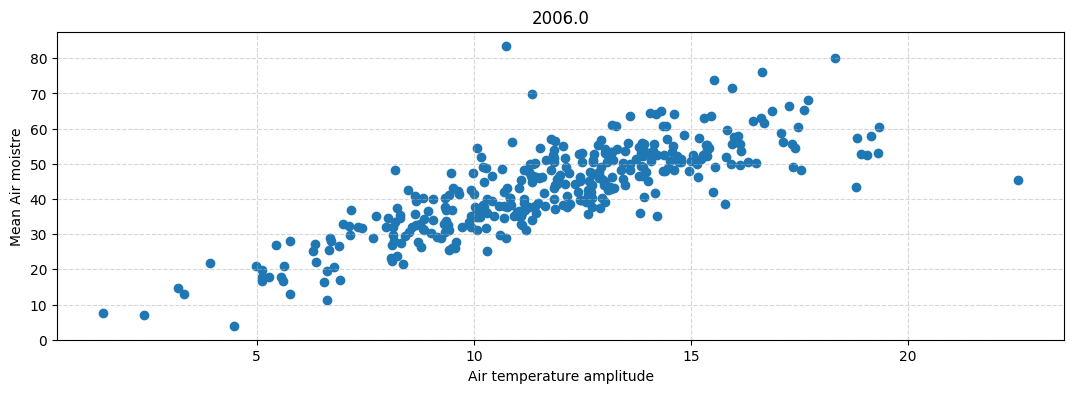

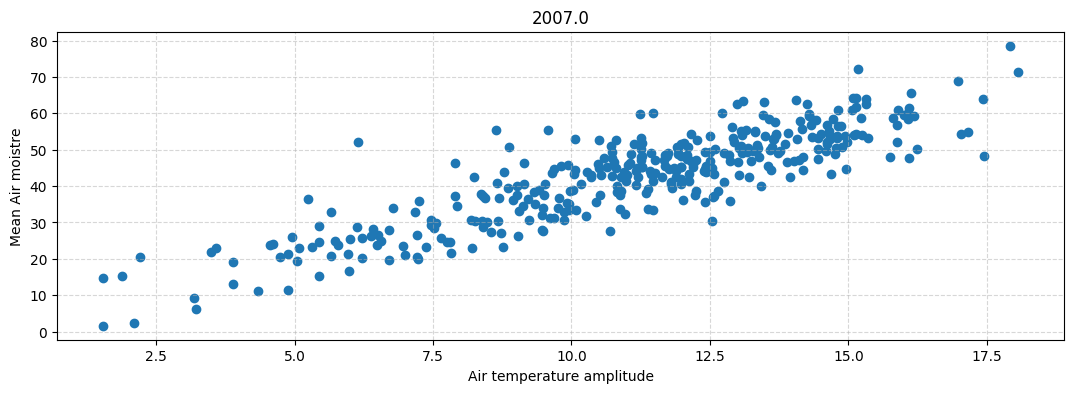

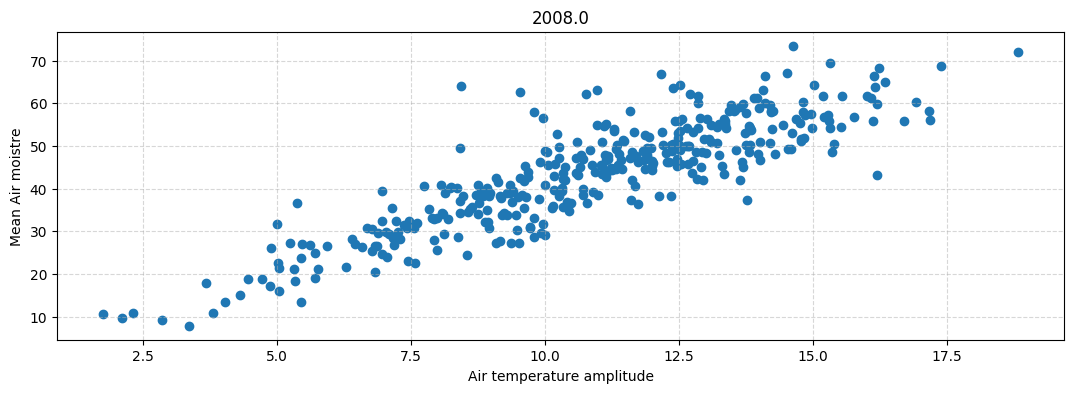

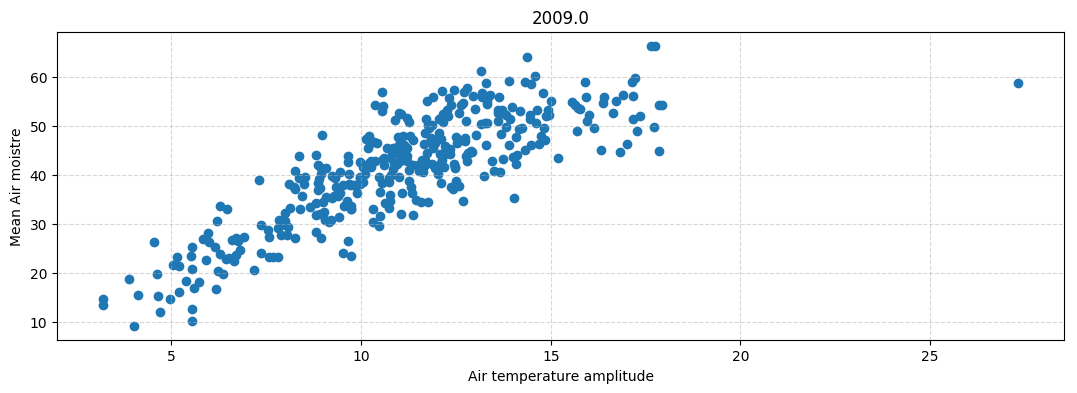

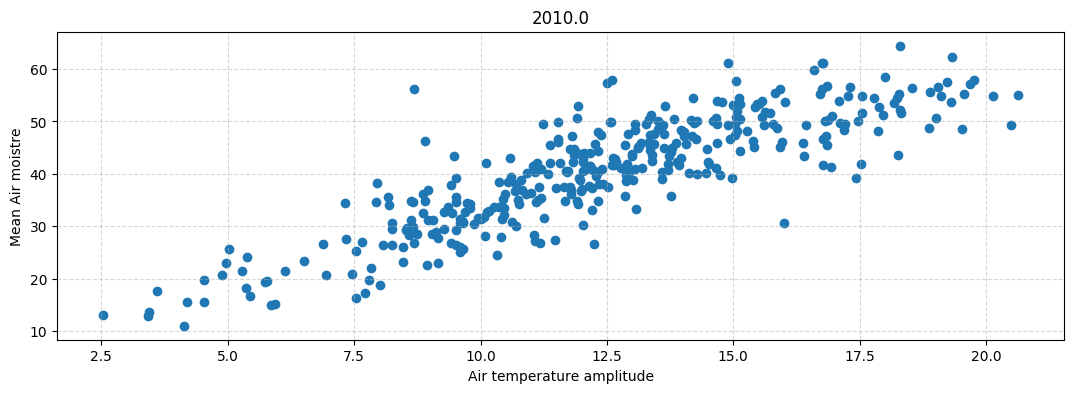

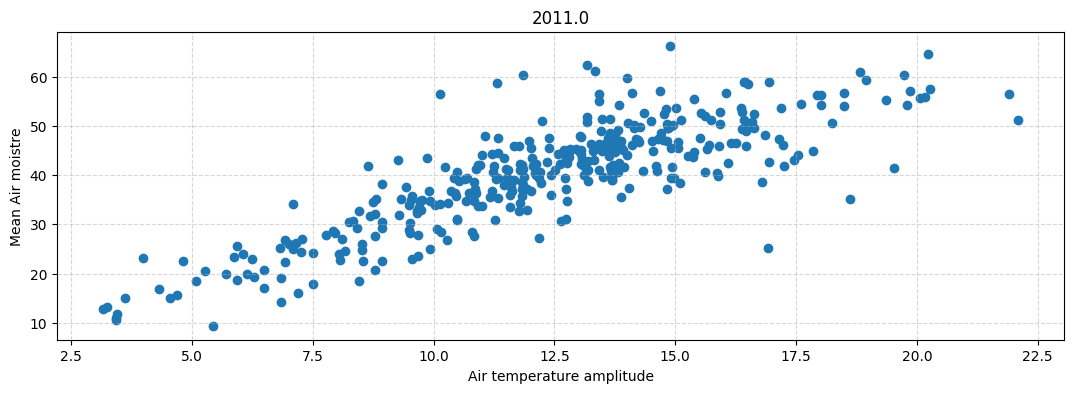

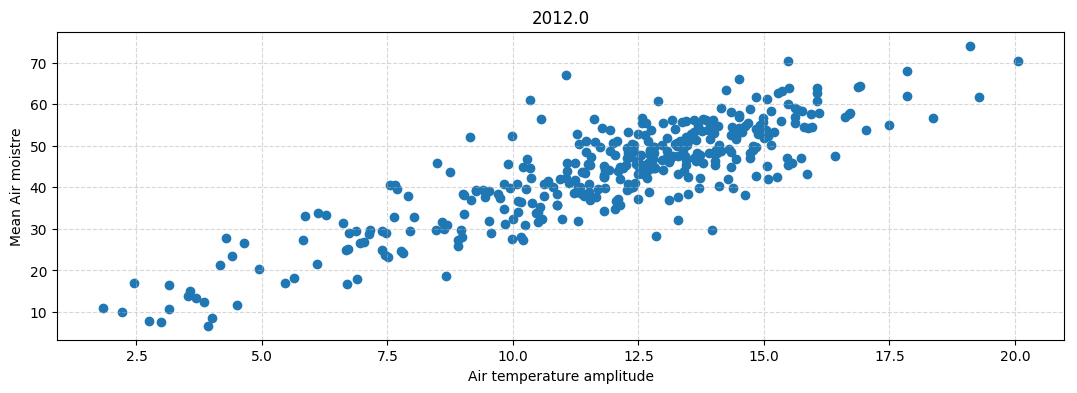

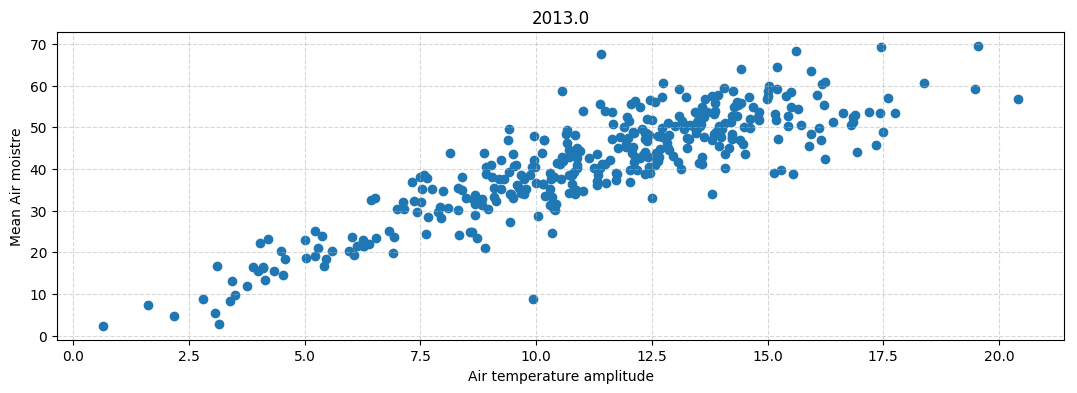

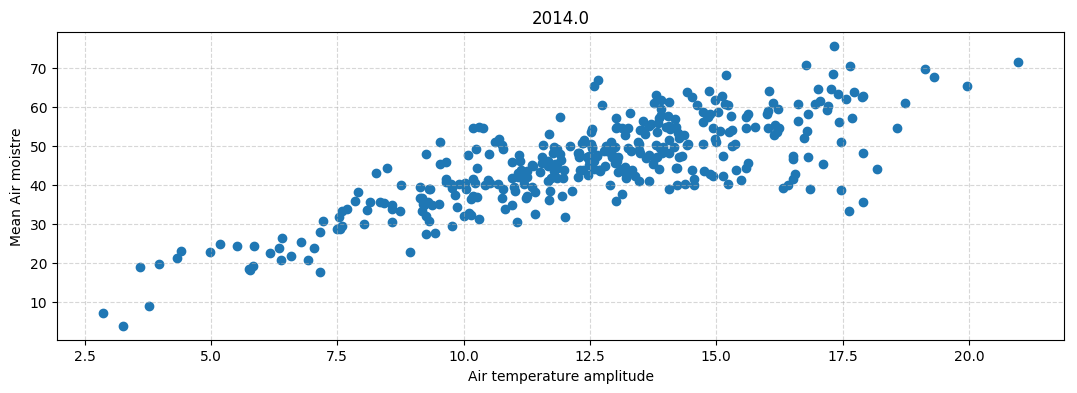

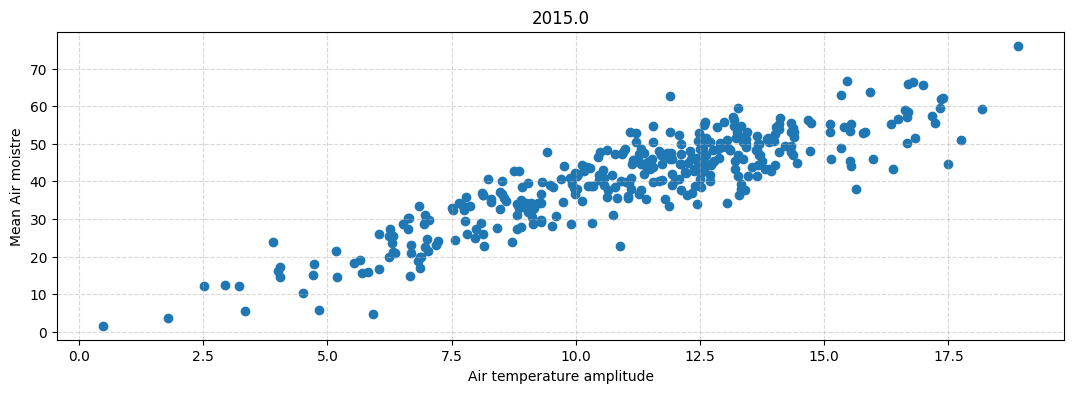

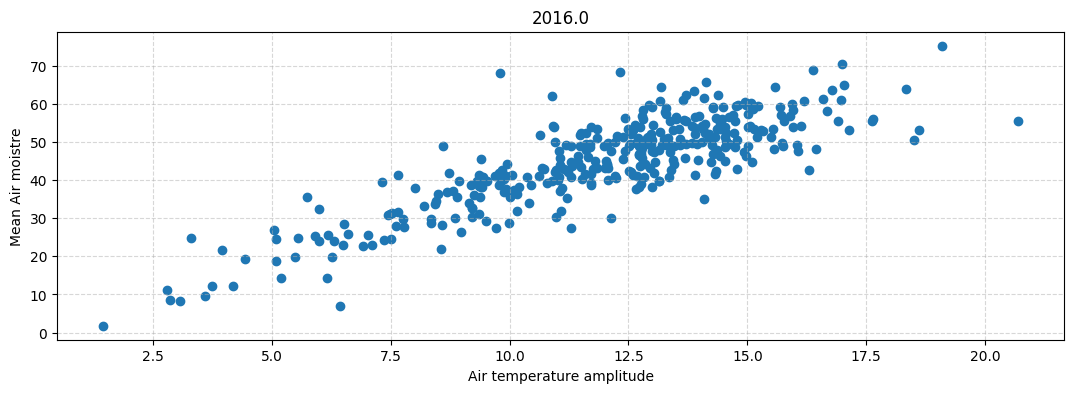

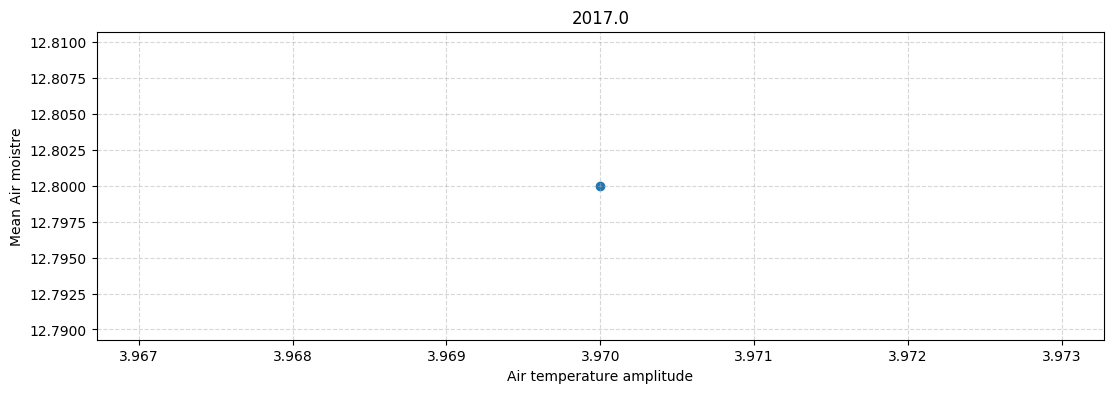

In [28]:
for i in data['YEAR'].unique():
    data_2plot = data[(data['YEAR'] == i)]
    var1 = 'N_THERMAMP'
    var2 = 'N_MTRAMP'

    plt.figure(figsize=(13,4))
    plt.title(str(i))    
    plt.scatter(data_2plot[var1], data_2plot[var2])
    plt.xlabel('Air temperature amplitude')
    plt.ylabel('Mean Air moistre')
    plt.grid(True, linestyle='--', alpha = 0.5)
    plt.show()

It seems to have a high correlation, lets check below:

In [48]:
# Checking correlation

data[['N_THERMAMP','N_MTRAMP']].corr()

N_THERMAMP  N_MTRAMP
N_THERMAMP    1.000000  0.798788
N_MTRAMP      0.798788  1.000000

There is a high spearman correlation

### The second hypothesis is that: Days with larger temperature amplitude have minimum air moistre bigger

Lets check it by visualizing the scatter plot of thermal amplitude and the mean moisture of the day

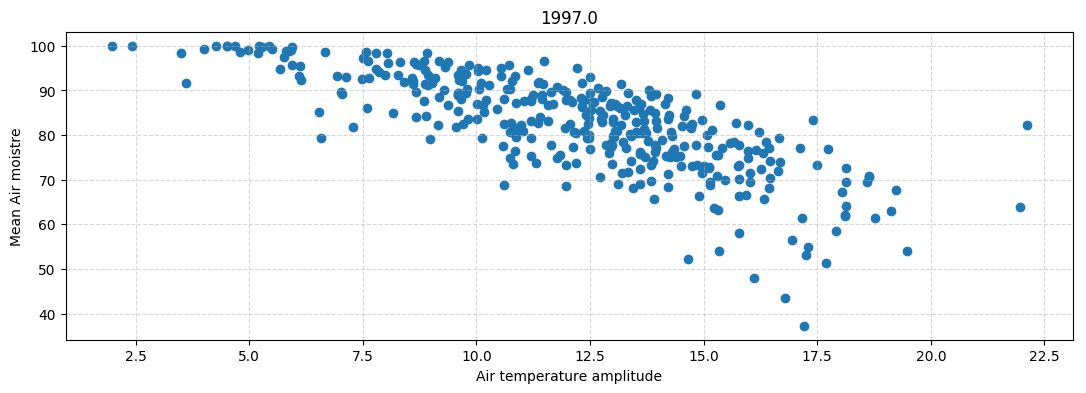

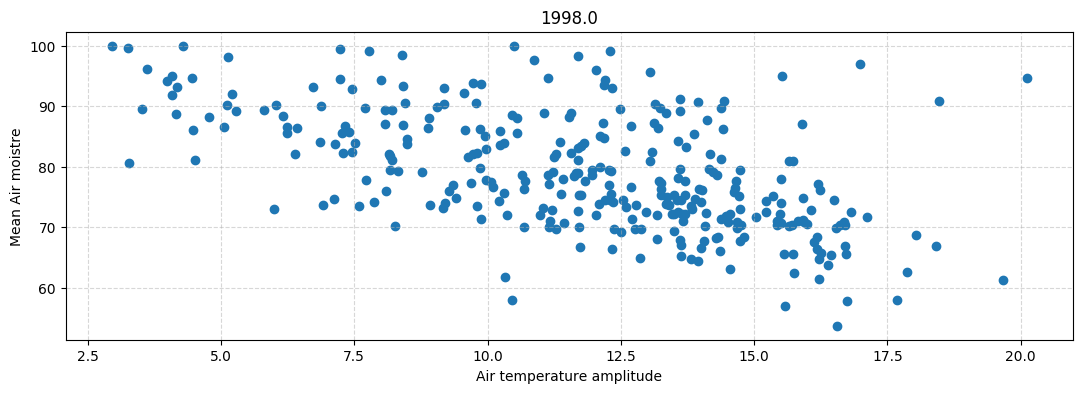

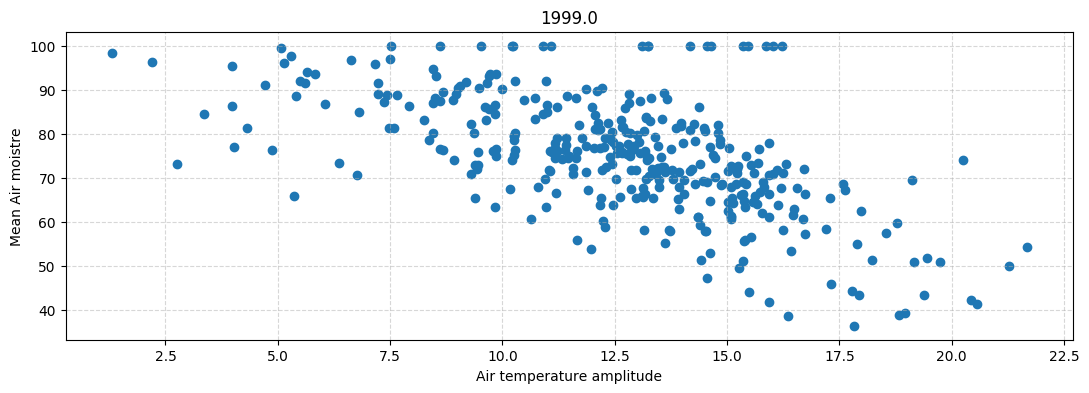

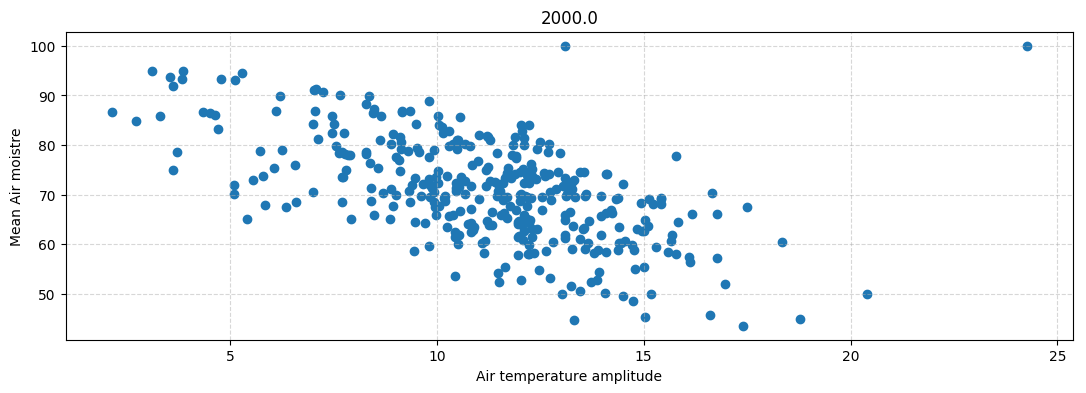

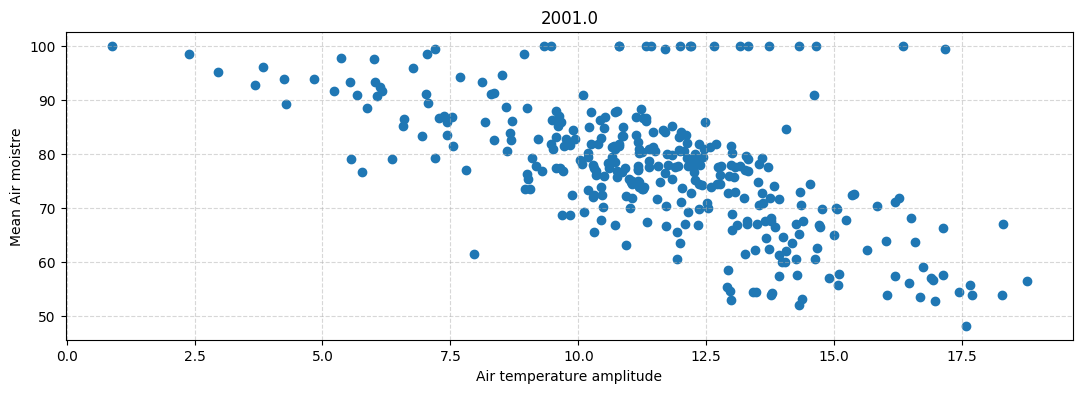

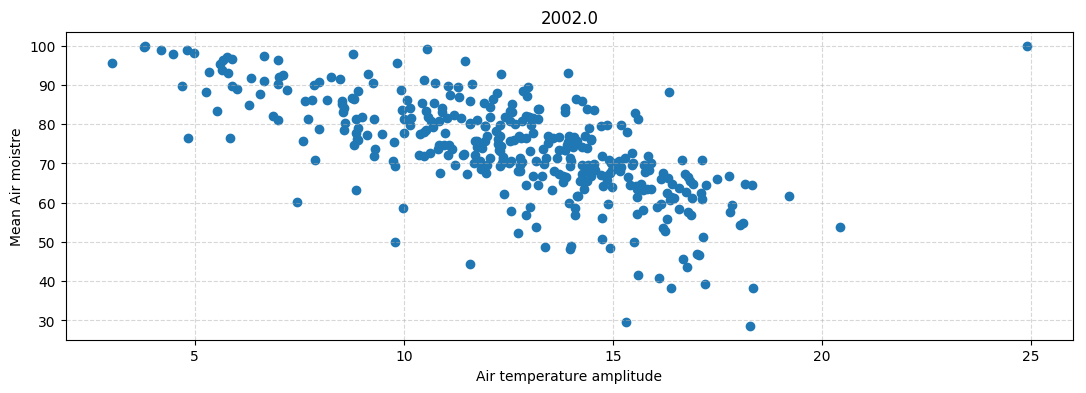

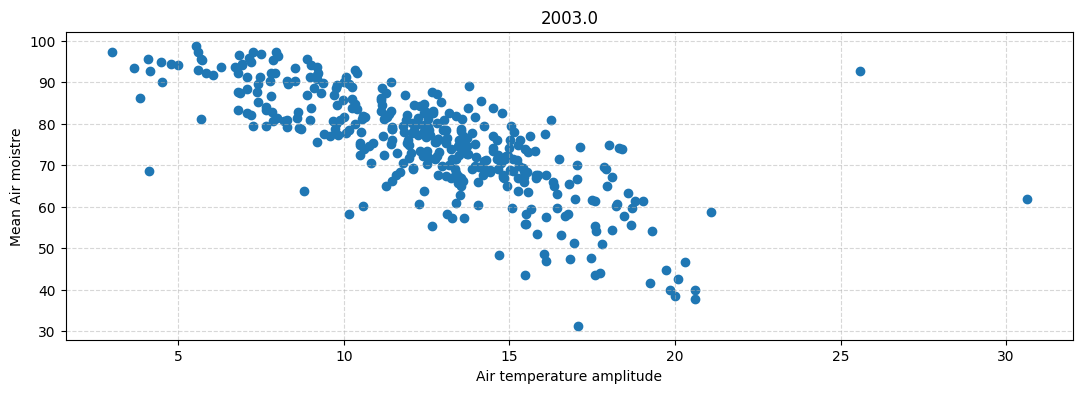

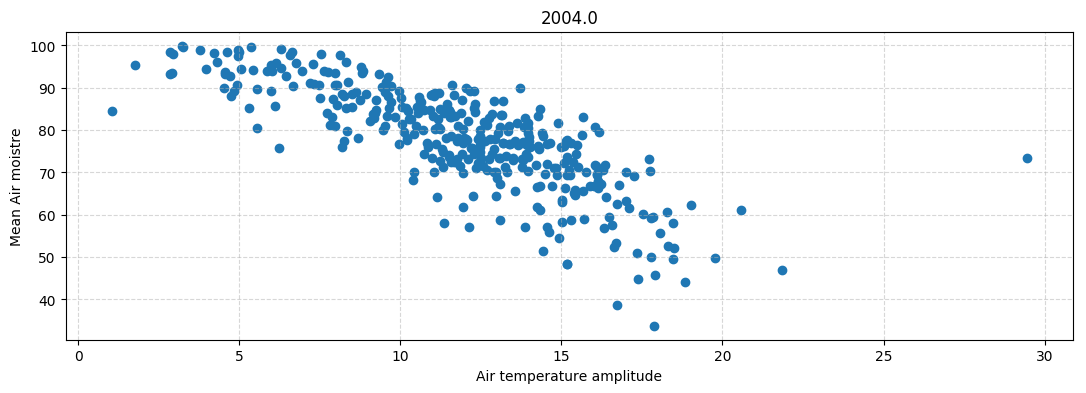

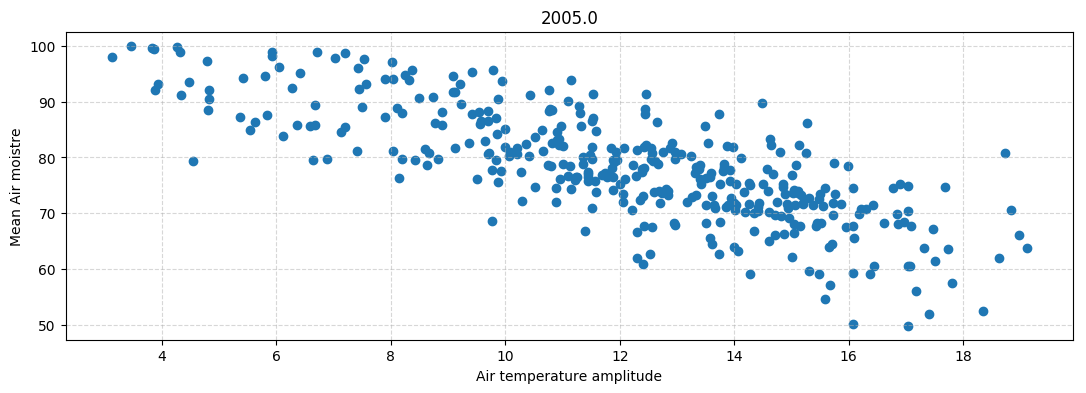

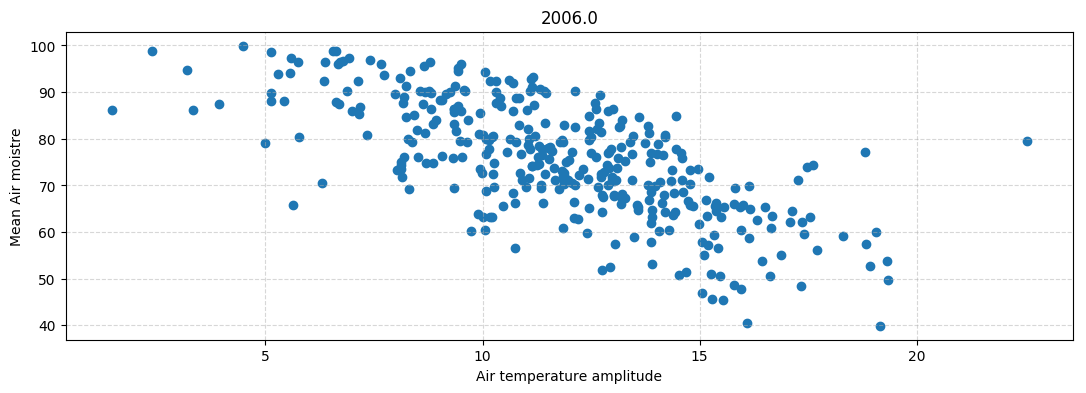

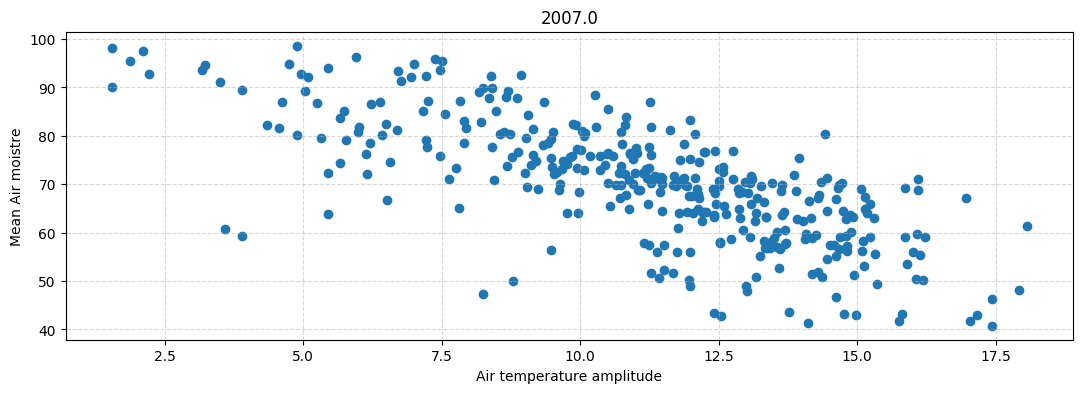

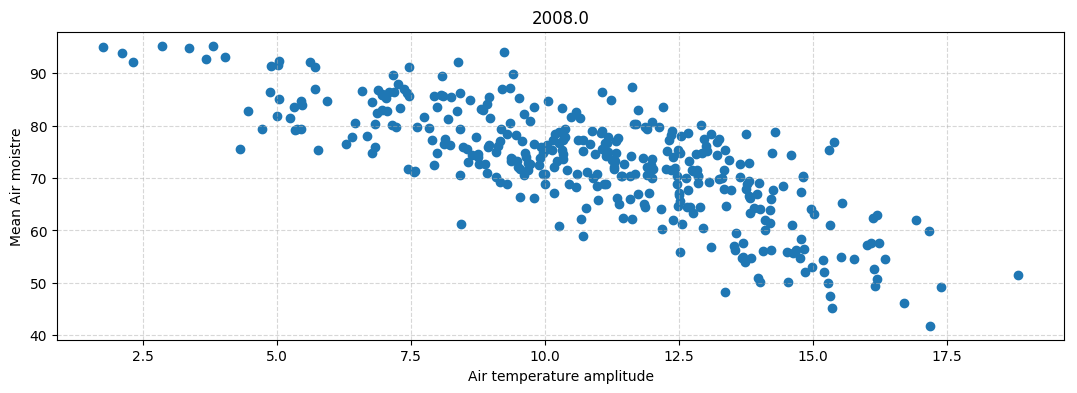

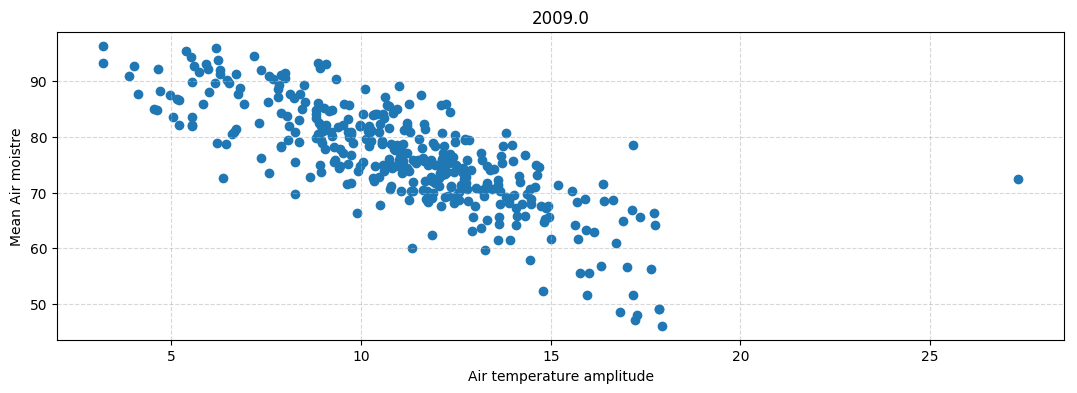

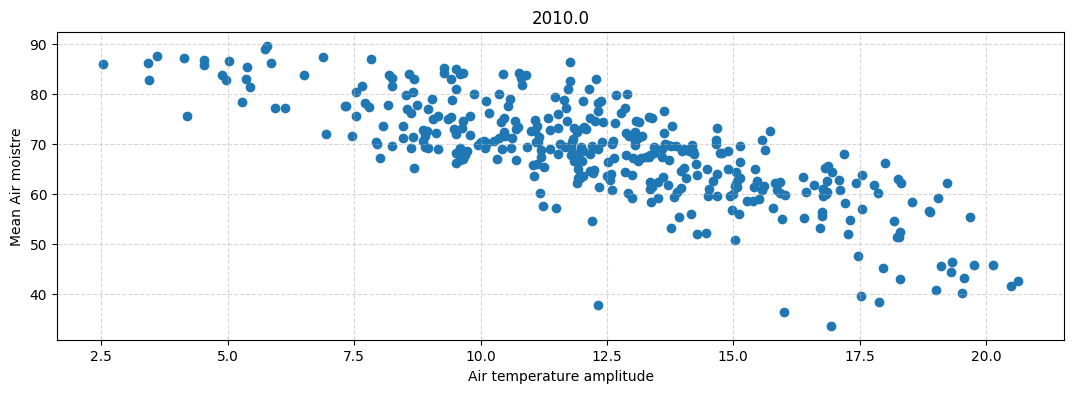

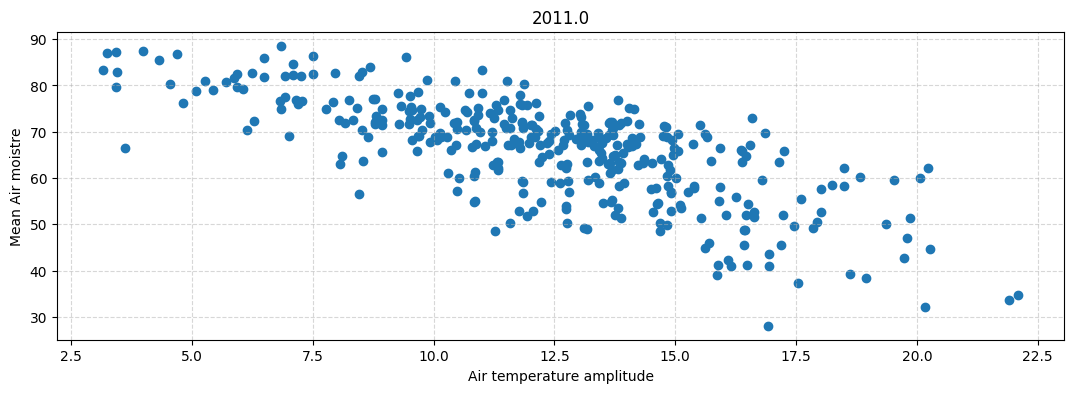

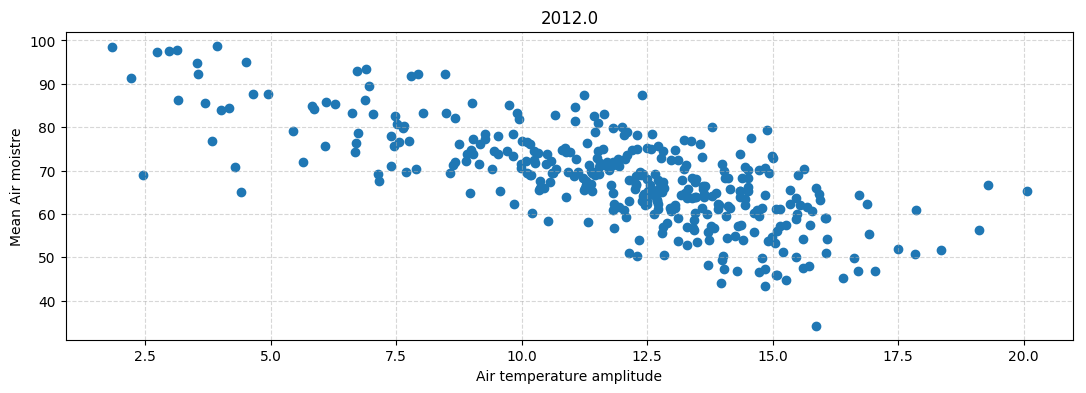

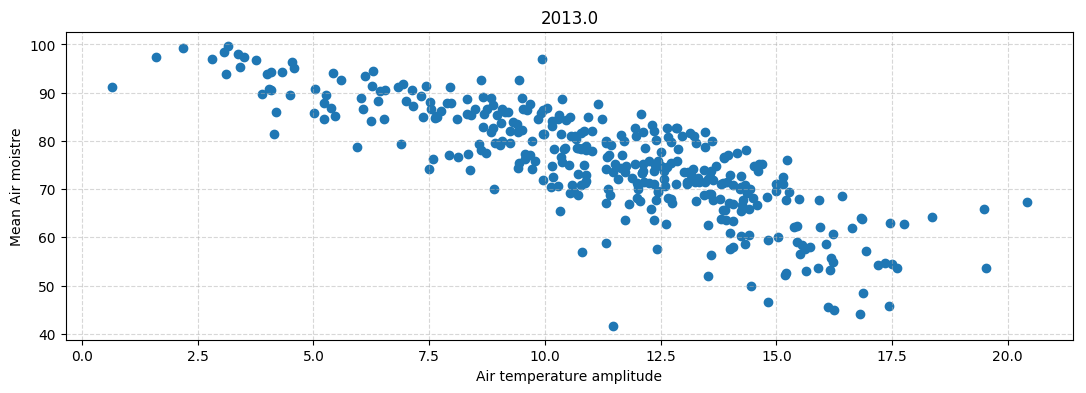

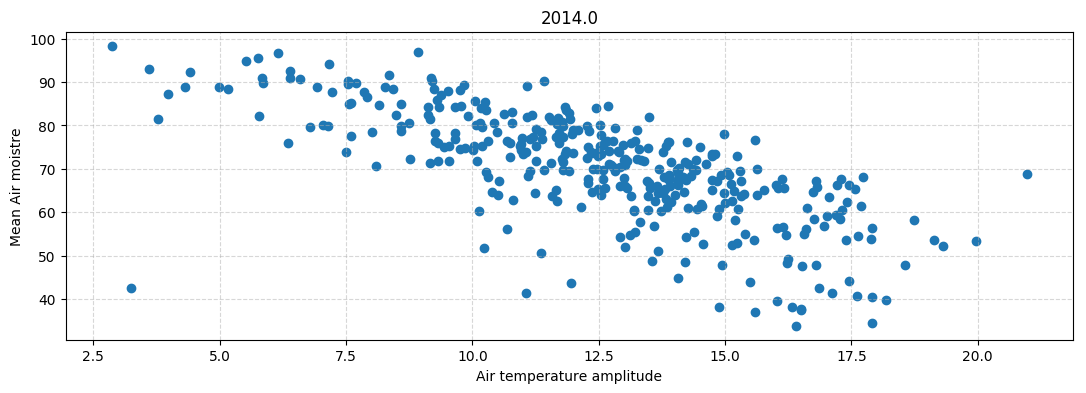

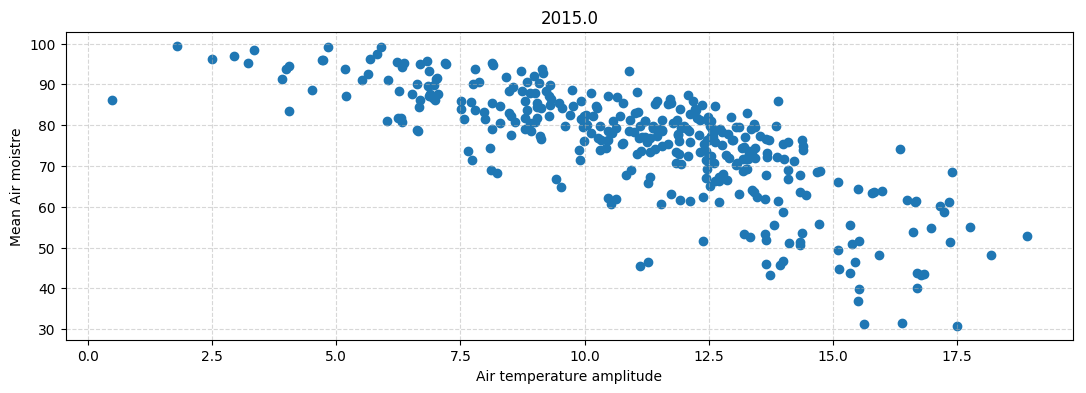

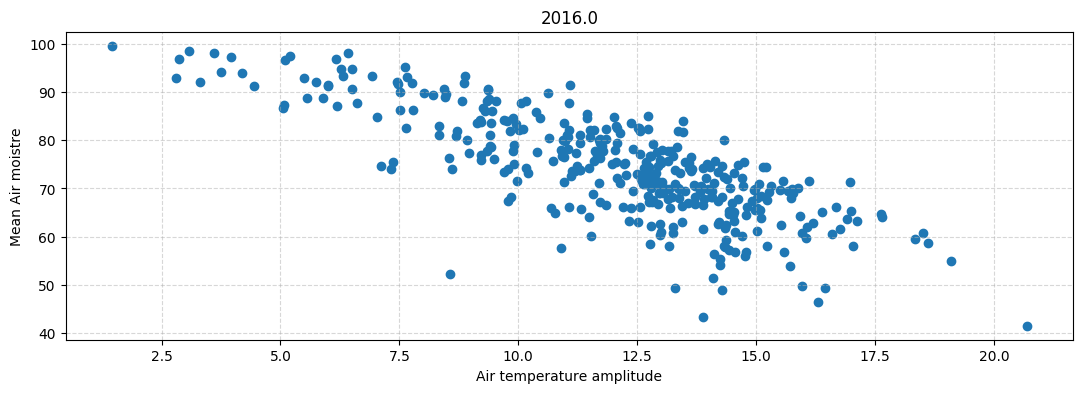

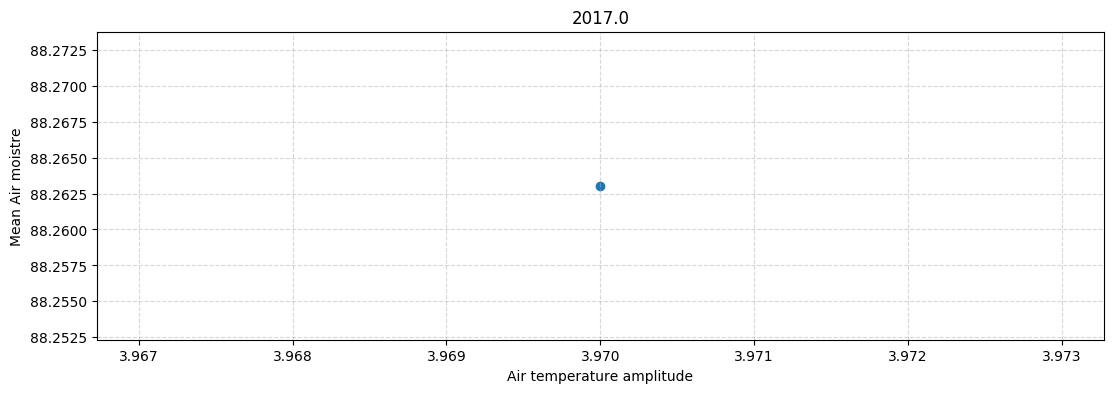

In [27]:
for i in data['YEAR'].unique():
    data_2plot = data[(data['YEAR'] == i)]
    var1 = 'N_THERMAMP'
    var2 = 'MEAN_N_AIRMTR_PCT10'

    plt.figure(figsize=(13,4))
    plt.title(str(i))    
    plt.scatter(data_2plot[var1], data_2plot[var2])
    plt.xlabel('Air temperature amplitude')
    plt.ylabel('Mean Air moistre')
    plt.grid(True, linestyle='--', alpha = 0.5)
    plt.show()

In [49]:
# Checking correlation

data[['N_THERMAMP','MEAN_N_AIRMTR_PCT10']].corr()

N_THERMAMP  MEAN_N_AIRMTR_PCT10
N_THERMAMP             1.000000            -0.671581
MEAN_N_AIRMTR_PCT10   -0.671581             1.000000

### Bin analysis of mean air moisture by thermal amplitudes bin

In [50]:
print(data['N_THERMAMP'].min(), data['N_THERMAMP'].max())

0.48 30.64


In [52]:
print(data['N_THERMAMP'].quantile(0.20), data['N_THERMAMP'].quantile(0.40) ,data['N_THERMAMP'].quantile(0.60), data['N_THERMAMP'].quantile(0.80))

9.082000000000003 11.27 12.84 14.548000000000002


In [53]:
def get_bins(x):
    if((x > 0) & (x <= 9.082000000000003)):
        return '0.48 - 9.1'
    elif((x > 9.082000000000003) & (x <= 11.27)):
        return '9.1 - 11.27'
    elif((x > 11.27) & (x <= 12.84)):
        return '11.27 - 12.84'
    elif((x > 12.84) & (x <= 14.548000000000002)):
        return '12.84 - 14.55'
    else:
        return '14.55 - 30.64'

In [54]:
data['BIN_N_THERMAMP'] = data['N_THERMAMP'].map(get_bins)

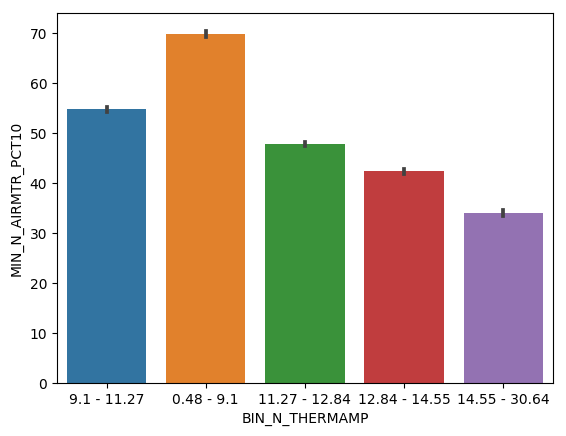

In [57]:
sns.barplot(data['BIN_N_THERMAMP'], data['MIN_N_AIRMTR_PCT10'], estimator=np.mean)

The hypothesis is true, most of the minimum values of air moisture is concentrated in high thermal amplitudes.

Keep attention because the orange bin is the minor value of Thermal Amplitude

[Main menu](#0)

<a id=2></a>

# 2. There is a relation between Derivate of Air Pression in 24h and air temperature

In [31]:
data.head(2)

YEAR  DAY365  MAX_N_WNDVEL_5M  DIR_MAX_N_WNDVEL_5M  MIN_N_WNDVEL_5M  \
0  1997.0     1.0           5561.0                 9.33            0.892   
1  1997.0     2.0           4266.0               154.70            0.363   

   DIR_MIN_N_WNDVEL_5M  MEAN_N_WNDVEL_5M  MAX_N_WNDVEL_2M  \
0                31.87       2302.065328           3075.0   
1                63.72       1949.374418           2876.0   

   DIR_MAX_N_WNDVEL_2M  MIN_N_WNDVEL_2M    ...     MEAN_N_PRESSION_HPA  \
0                134.4            0.763    ...              942.831933   
1                152.0            0.626    ...              943.809091   

   MAX_N_RAIN_SUM10  DIR_MAX_N_RAIN_SUM10  MIN_N_RAIN_SUM10  \
0               0.0                  8.32               0.0   
1               0.0                131.60               0.0   

   DIR_MIN_N_RAIN_SUM10  MEAN_N_RAIN_SUM10  MONTH  WEEK  N_THERMAMP  N_MTRAMP  
0                  8.32                0.0      1   0.0       10.86     39.33  
1                131.60                0.0      1   0.0        6.58     21.89  

[2 rows x 76 columns]

In [33]:
data.shift(-1).head(2)

YEAR  DAY365  MAX_N_WNDVEL_5M  DIR_MAX_N_WNDVEL_5M  MIN_N_WNDVEL_5M  \
0  1997.0     2.0           4266.0                154.7            0.363   
1  1997.0     3.0           4835.0                162.4            2.050   

   DIR_MIN_N_WNDVEL_5M  MEAN_N_WNDVEL_5M  MAX_N_WNDVEL_2M  \
0                63.72       1949.374418           2876.0   
1               131.10       2560.208496           2907.0   

   DIR_MAX_N_WNDVEL_2M  MIN_N_WNDVEL_2M    ...     MEAN_N_PRESSION_HPA  \
0                152.0            0.626    ...              943.809091   
1                 94.8            0.717    ...              945.424779   

   MAX_N_RAIN_SUM10  DIR_MAX_N_RAIN_SUM10  MIN_N_RAIN_SUM10  \
0               0.0                 131.6               0.0   
1               0.0                 148.2               0.0   

   DIR_MIN_N_RAIN_SUM10  MEAN_N_RAIN_SUM10  MONTH  WEEK  N_THERMAMP  N_MTRAMP  
0                 131.6                0.0    1.0   0.0        6.58     21.89  
1                 148.2                0.0    1.0   0.0        7.28     26.81  

[2 rows x 76 columns]

In [58]:
# Creating derivate variable of Pression, by a directly variation and by a numpy gradient function

data['1DERIVATE_MEAN_N_PRESSION_HPA'] = data['MEAN_N_PRESSION_HPA'].diff(-1)/data['MEAN_N_PRESSION_HPA']
data['2DERIVATE_MEAN_N_PRESSION_HPA'] = np.gradient(data['MEAN_N_PRESSION_HPA'].values)

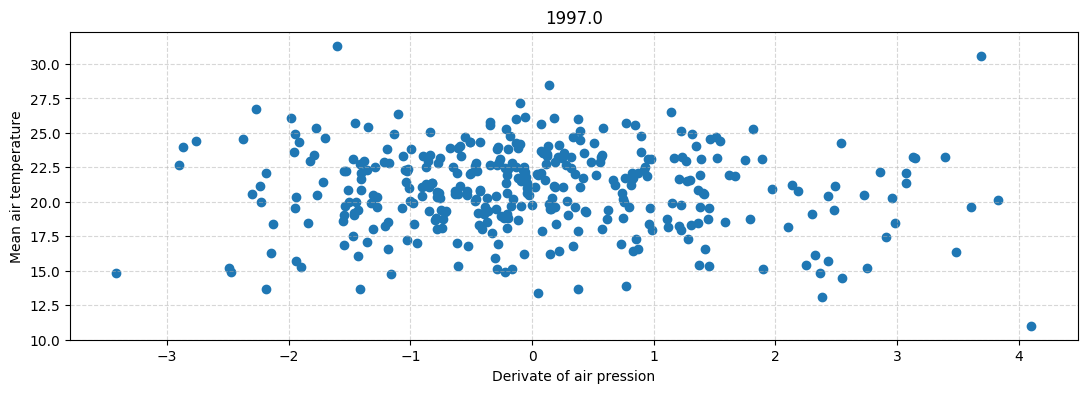

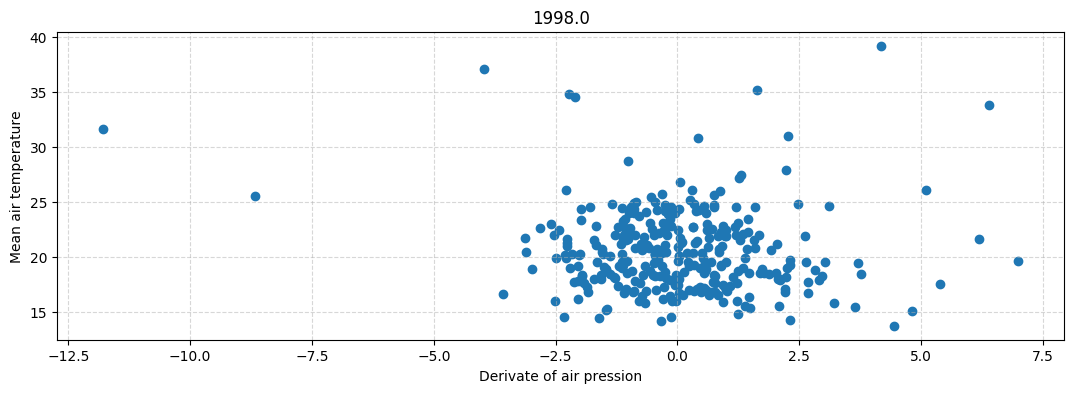

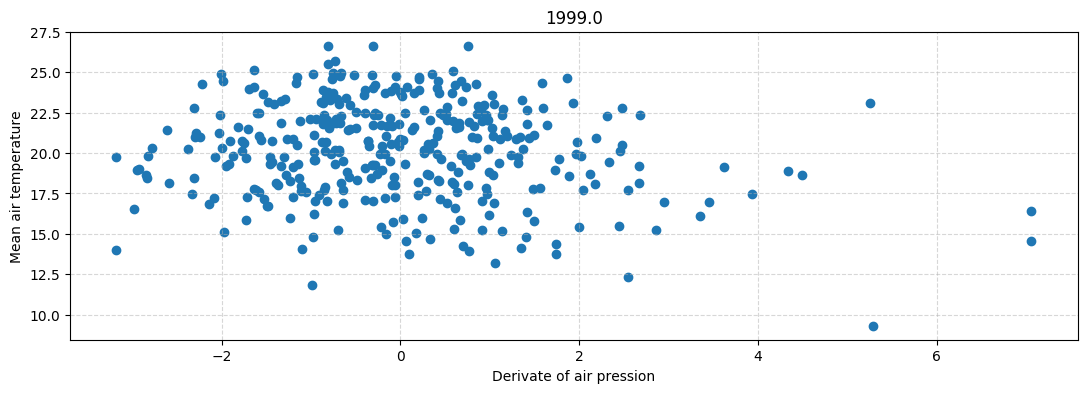

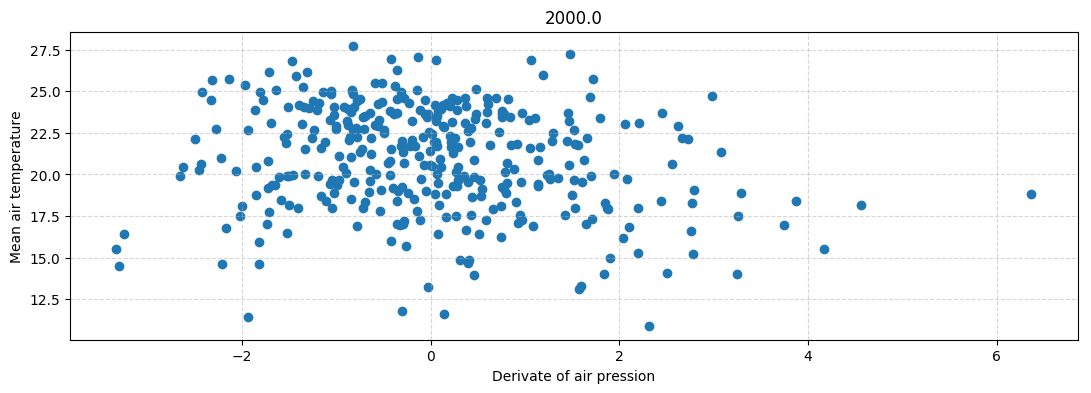

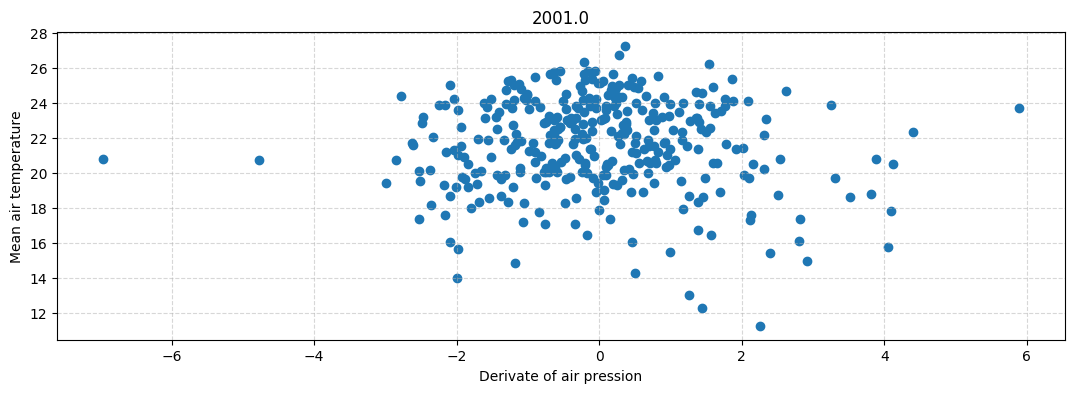

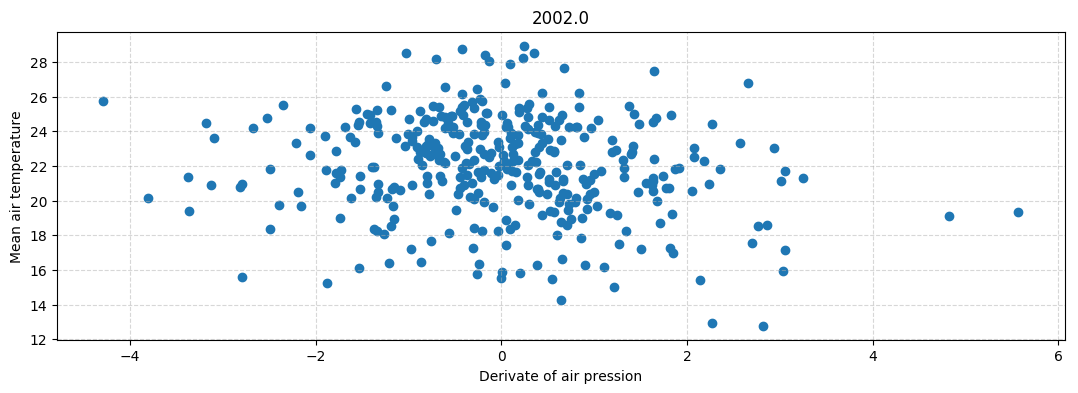

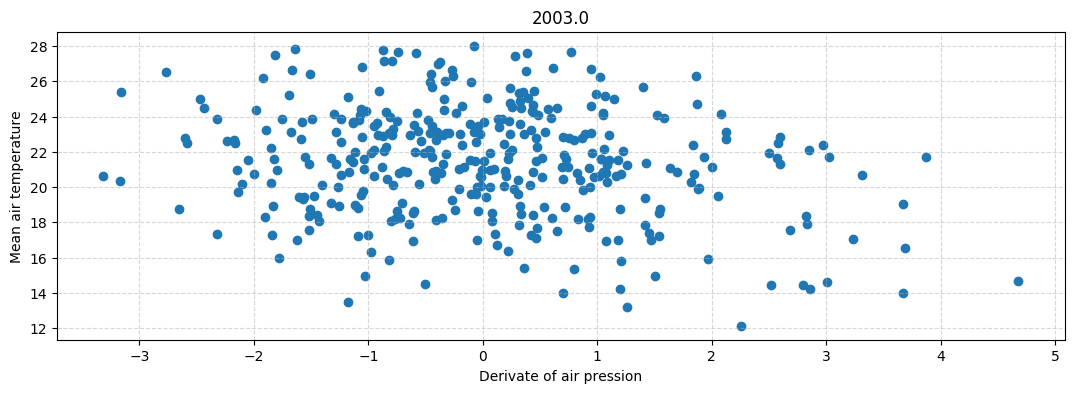

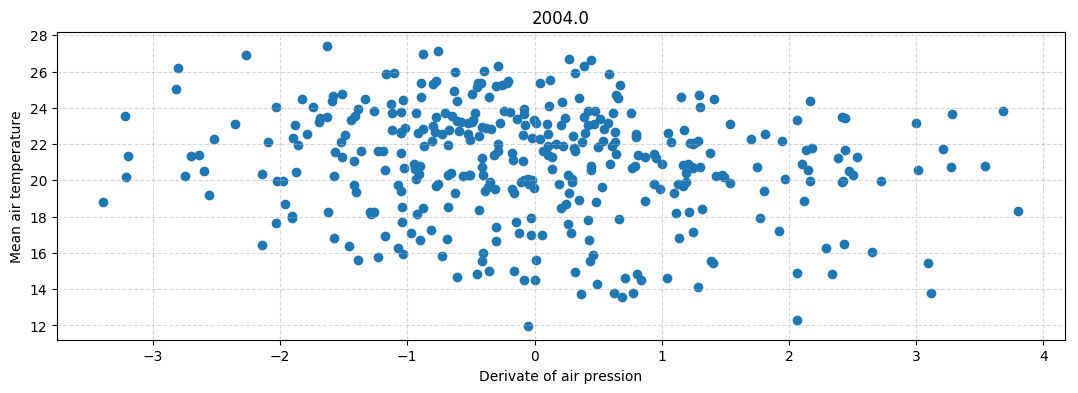

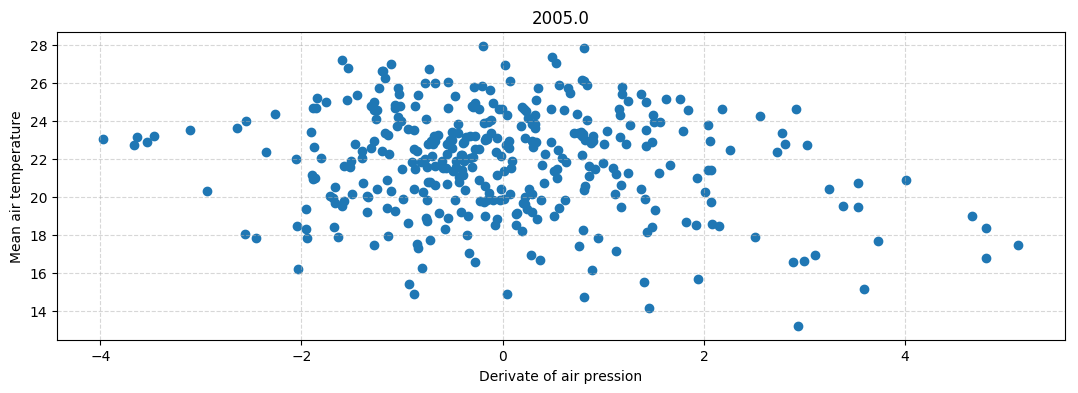

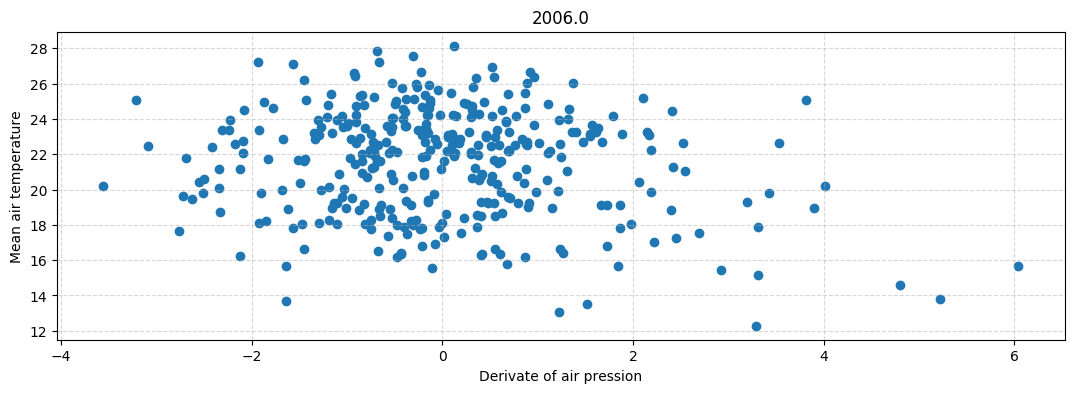

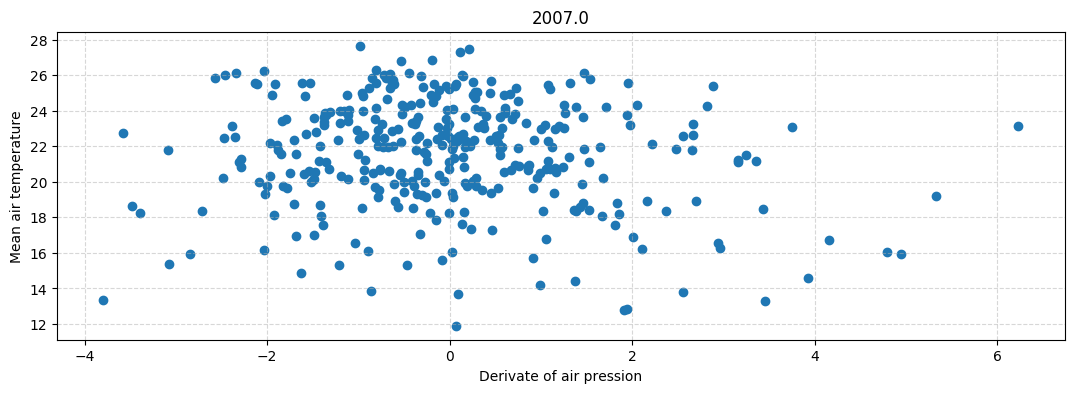

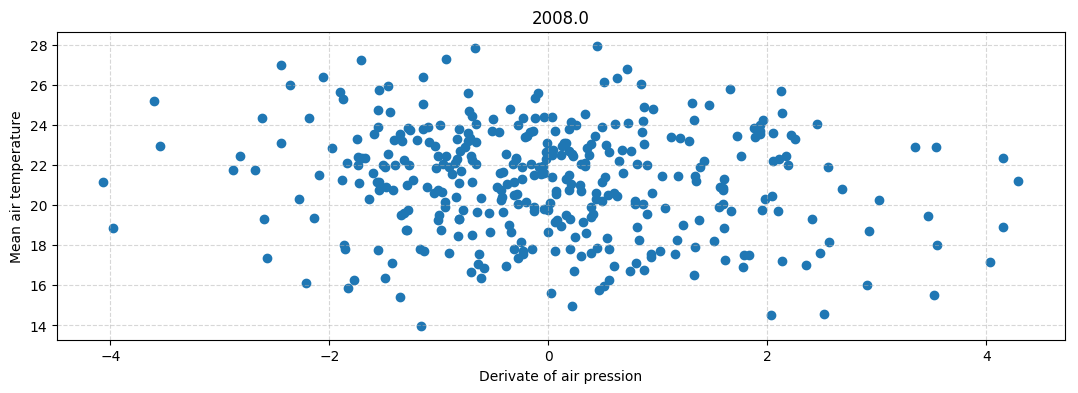

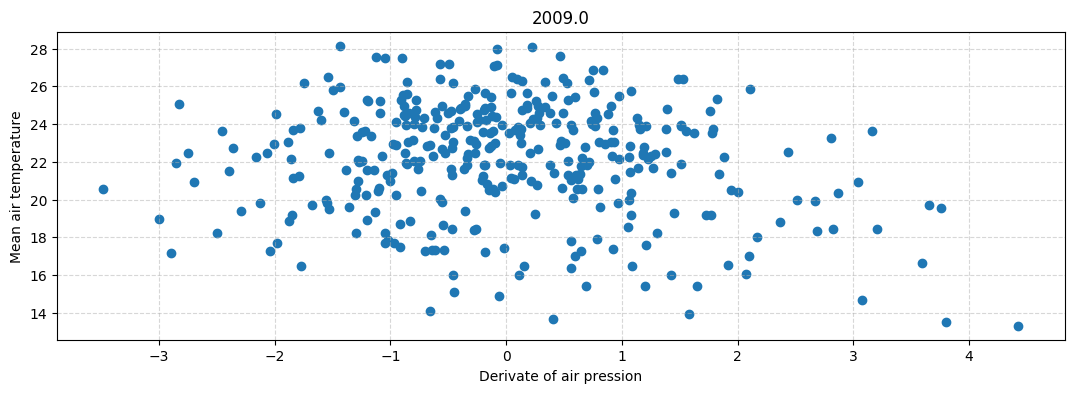

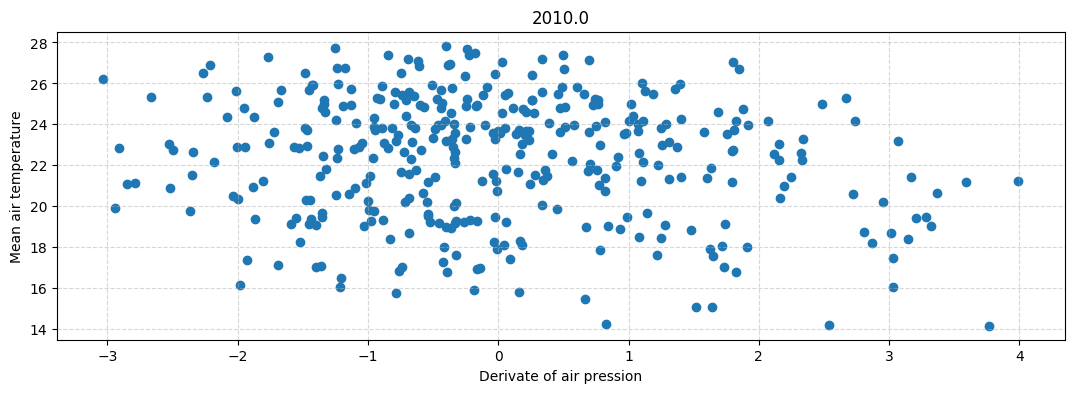

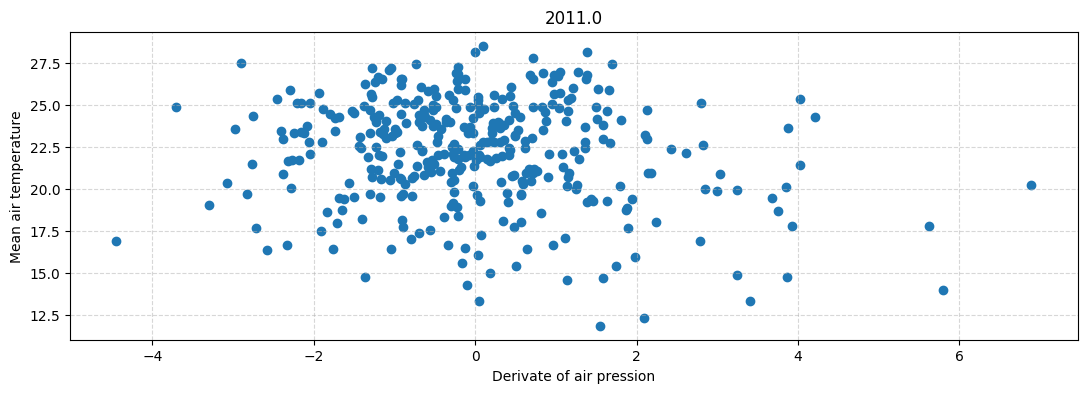

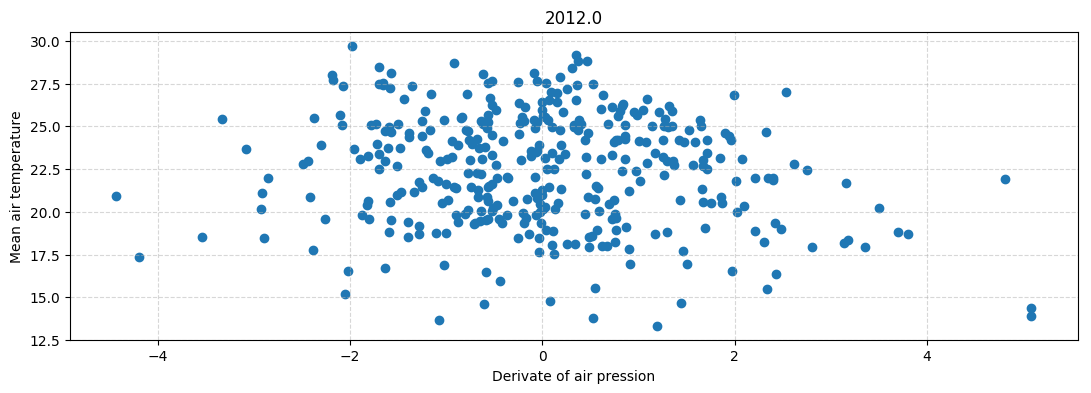

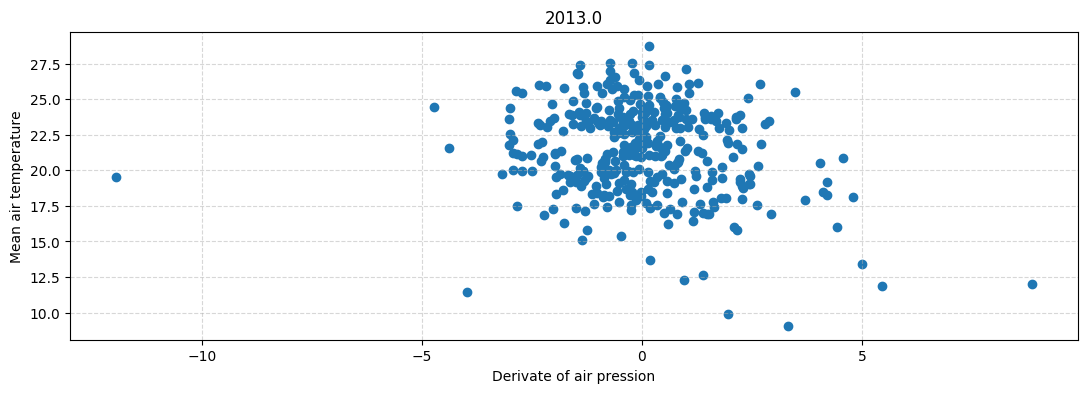

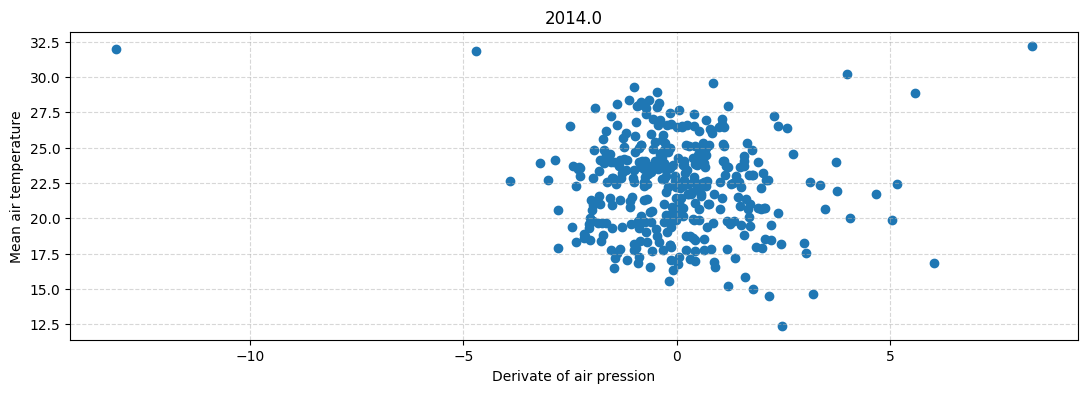

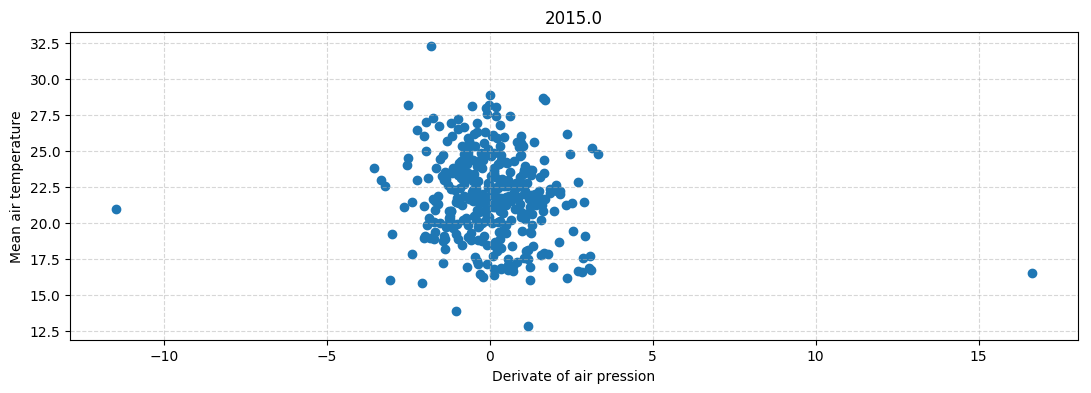

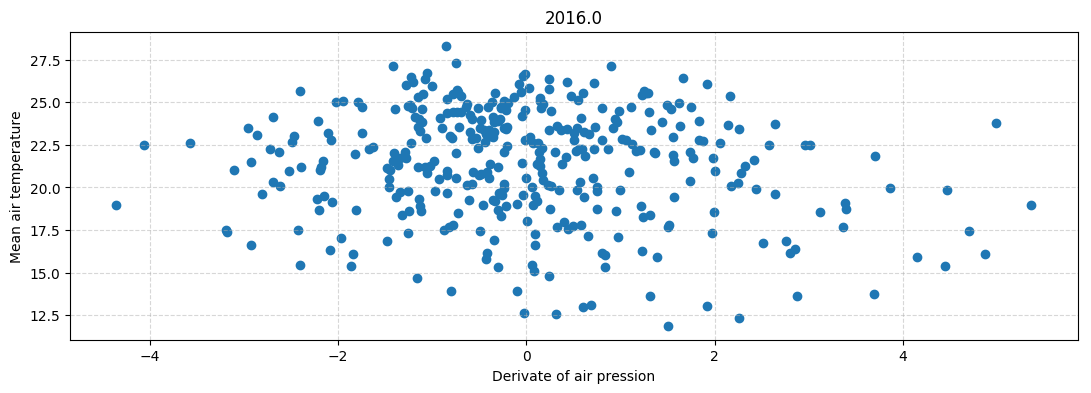

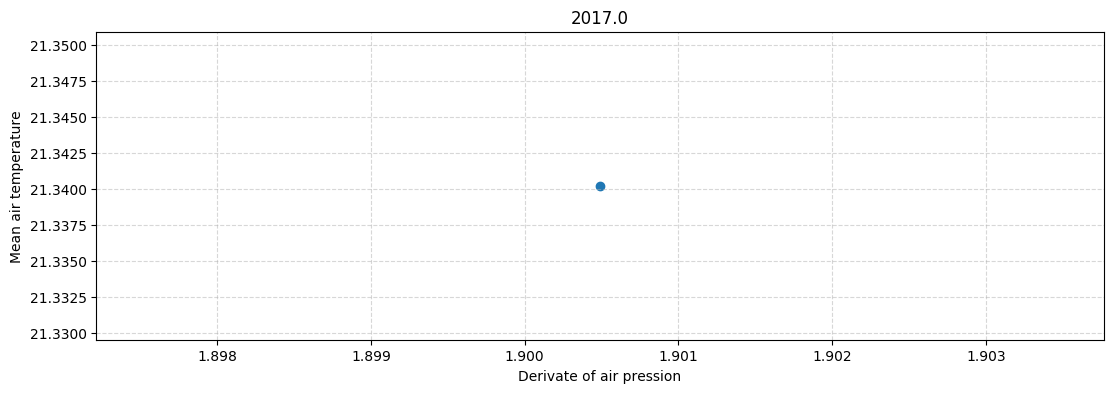

In [59]:
for i in data['YEAR'].unique():
    data_2plot = data[(data['YEAR'] == i)]
    var1 = '2DERIVATE_MEAN_N_PRESSION_HPA'
    var2 = 'MEAN_N_AIRTMP_MED10'

    plt.figure(figsize=(13,4))
    plt.title(str(i))    
    plt.scatter(data_2plot[var1], data_2plot[var2])
    plt.xlabel('Derivate of air pression')
    plt.ylabel('Mean air temperature')
    plt.grid(True, linestyle='--', alpha = 0.5)
    plt.show()

In [60]:
# Checking correlation

data[['1DERIVATE_MEAN_N_PRESSION_HPA','2DERIVATE_MEAN_N_PRESSION_HPA','MEAN_N_AIRTMP_MED10']].corr()

1DERIVATE_MEAN_N_PRESSION_HPA  \
1DERIVATE_MEAN_N_PRESSION_HPA                       1.000000   
2DERIVATE_MEAN_N_PRESSION_HPA                      -0.757306   
MEAN_N_AIRTMP_MED10                                -0.035185   

                               2DERIVATE_MEAN_N_PRESSION_HPA  \
1DERIVATE_MEAN_N_PRESSION_HPA                      -0.757306   
2DERIVATE_MEAN_N_PRESSION_HPA                       1.000000   
MEAN_N_AIRTMP_MED10                                -0.139555   

                               MEAN_N_AIRTMP_MED10  
1DERIVATE_MEAN_N_PRESSION_HPA            -0.035185  
2DERIVATE_MEAN_N_PRESSION_HPA            -0.139555  
MEAN_N_AIRTMP_MED10                       1.000000

It doesn't seems to have a correlation between Pression variation and temperature at a first look

[Main menu](#0)

<a id='3'></a>

# 3. Analyzing heat waves along the years

### Definition: 

**The definition of a heat wave according to [Quantifying excess deaths related to
heatwaves under climate change scenarios: A
multicountry time series modelling study](https://journals.plos.org/plosmedicine/article/file?id=10.1371/journal.pmed.1002629&type=printable) is: *At
least two consecutive days with daily mean temperature exceeding the 95th percentile of the
year-round daily temperatures of that city from recent data (i.e., the years representing ‘current’ data).* **

So our analysis will considerate a per year analaysis of heatwaves

In [128]:
# First step: How can we get a "three day (or more) consecutive with mean exceeding 95th percentile" ?, so lets take an example:

data_an = data[(data.YEAR == 2015)&(data.MONTH == 1)]
p95th = data[data.YEAR == 2015]['MEAN_N_AIRTMP_MED10'].quantile(0.95)

data_an[data_an['MEAN_N_AIRTMP_MED10'] > p95th][['DAY365','MEAN_N_AIRTMP_MED10']]

DAY365  MEAN_N_AIRTMP_MED10
6487     9.0            27.212979
6488    10.0            28.096763
6489    11.0            28.223217
6490    12.0            27.583287
6491    13.0            28.030732
6494    16.0            28.188651
6495    19.0            32.300476
6496    20.0            28.653147

Here we see that there is one heat wave, starting in day 11 of january of 2015

In [130]:
# Lets try something: Lets iterate along days in a year checking for day, day + 1 and days + 2, if these days are exceeding p95th then we run while
# day+1 > p95th then flag with one

# Defining variable that flags heta waves with zeros
data['FLAG_HEATWAVE'] = 0

# Creating a function that returns if there is information in some day
def check_day(data, day):
    if(data[data['DAY365'] == day].shape[0] == 0):
        return False
    else:
        return True

for y in data['YEAR'].unique():
    data_year = data[data['YEAR'] == y]
    
    p95th = data_year['MEAN_N_AIRTMP_MED10'].quantile(.95)
    
    for d in data_year['DAY365'].unique():
        
        if(not((check_day(data_year,d)) &  (check_day(data_year,d+1)) & (check_day(data_year,d+2)))):
#             print(not((check_day(data_year,d)) &  (check_day(data_year,d+1)) & (check_day(data_year,d+2))))
            pass
        else:
#             print('Entrou')
            i = 0
            if(data_year[data_year['DAY365'] == d]['MEAN_N_AIRTMP_MED10'].values > p95th):
    
                if(data_year[data_year['DAY365'] == d+1]['MEAN_N_AIRTMP_MED10'].values > p95th):
            
                    if(data_year[data_year['DAY365'] == d+2]['MEAN_N_AIRTMP_MED10'].values > p95th):
#                         print('Começou onda de calor')
                        i = 2
                        while(data_year[data_year['DAY365'] == d+i]['MEAN_N_AIRTMP_MED10'].values > p95th):
                            data.loc[(data['YEAR'] == y) & (data['DAY365'] == d+i) , 'FLAG_HEATWAVE'] = 1
#                             print("Marcando")
                            i = i+ 1
                    else:
                        pass
                else:
                    pass
            else:
                pass

In [131]:
data['FLAG_HEATWAVE'].sum()

107

In [132]:
# Checking consistency of flag

year = 2011

data_an = data[(data.YEAR == year)&(data.MONTH == 1)]
p95th = data[data.YEAR == year]['MEAN_N_AIRTMP_MED10'].quantile(0.95)

data_an[data_an['MEAN_N_AIRTMP_MED10'] > p95th][['DAY365','MEAN_N_AIRTMP_MED10','FLAG_HEATWAVE']]

# Apparently the flag is consistent

DAY365  MEAN_N_AIRTMP_MED10  FLAG_HEATWAVE
5039    21.0            26.865693              0
5040    22.0            27.409444              0
5041    23.0            26.935474              1
5044    26.0            27.397626              0
5045    27.0            28.144745              0
5046    28.0            28.116838              1
5047    29.0            26.732553              1
5048    30.0            27.229928              1

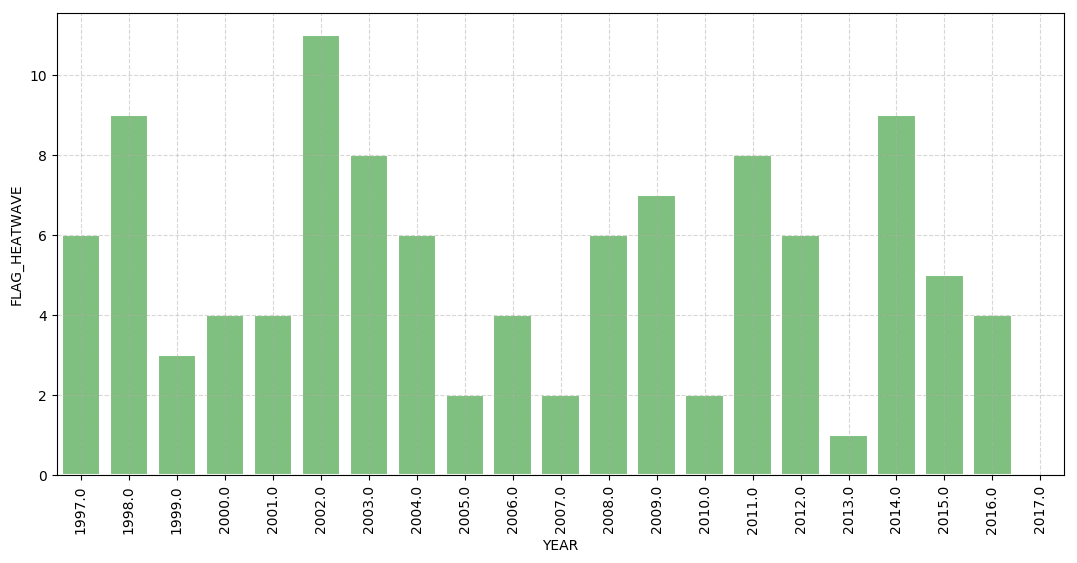

In [148]:
# Counting HEATWAVES per year

hw_count = data.groupby('YEAR').agg({'FLAG_HEATWAVE': np.sum}).reset_index()


plt.figure(figsize=(13,6))
sns.barplot(hw_count.YEAR, hw_count.FLAG_HEATWAVE, linewidth=1.5, facecolor= (0,0.5,0, 0.5) , errcolor ='0', edgecolor = "1")
plt.grid(True, linestyle='--', alpha = 0.5)
plt.xticks(rotation = 90)
plt.show()

[Main menu](#0)